# Create a data file for SN2014J light curve

Using the [AAVSO light curve](https://www.aavso.org/lcg/plot?auid=000-BLG-310&starname=SN+2014J&lastdays=30&start=01/21/2014&stop=02/21/2014&obscode=&obscode_symbol=2&obstotals=yes&calendar=calendar&forcetics=&grid=on&visual=on&uband=on&v=on&pointsize=1&width=1200&height=450&mag1=&mag2=&mean=&vmean=) and [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('SN2014JAAVSO.csv')
df

,days,mag
0,0.054591,12.242899
1,0.573201,12.006140
2,1.037221,11.784686
3,1.637717,11.563042
4,2.374690,11.356438
5,3.029777,11.188019
6,3.712159,11.057632
7,4.640199,10.904063
8,5.377171,10.781216
9,6.168734,10.696364


(12.2, 10.4)

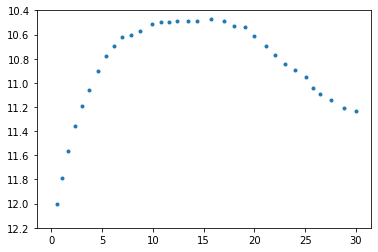

In [7]:
f,ax = plt.subplots()
ax.plot(df['days'],df['mag'],'.')
ax.set_ylim(12.2, 10.4)

### Try equation 7 from [this paper](https://arxiv.org/abs/1612.02097)

In [211]:
def SNIaLC(t, A, t0, tb, a1, a2, s):
    ar = 2.*(a1 + 1.)
    ad = a1 - a2
    tfac = (t - t0)/tb
    return A * tfac**ar * (1. + tfac**(s*ad))**(-2./s)


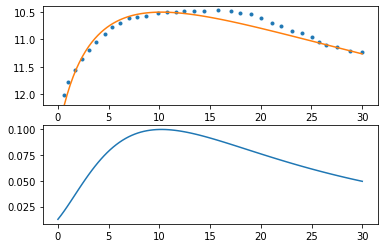

In [215]:
tval = np.linspace(0, 30, 100)

#fit by eye
A = 1
t0 = -2
tb = 13.
a1 = 0.1
a2 = -2.2
s = 0.6
mag0 = 8

lum = SNIaLC(tval, A, t0, tb, a1, a2, s)
mag = -2.5*np.log10(lum) + mag0 

f, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(df['days'],df['mag'],'.')
ax1.plot(tval, mag)
#plt.gca().invert_yaxis()
ax1.set_ylim(12.2, 10.4)

ax2.plot(tval, lum)